In [6]:
import pandas as pd
import seaborn as sns
from utils import load_dataframe_csv

In [4]:
df = load_dataframe_csv('tables', 'Explainability_CIFAR10.csv')

In [5]:
df.head()

,data,explainer,scale,coverage,hit_rate,execution_time
0,CIFAR10,YADEA,False,0.903333,1.00,12.946430
1,CIFAR10,YADEA,True,0.206667,0.02,4.660745
2,CIFAR10,RPS,False,0.116667,0.01,2.136416
3,CIFAR10,IF,True,0.130000,0.02,200.735968
4,CIFAR10,TracIn,True,0.130000,0.02,44.333229


In [14]:
df['names'] = df['explainer'] +  ["*" if i else "" for i in df['scale'].to_list()]

<AxesSubplot: xlabel='names', ylabel='coverage'>

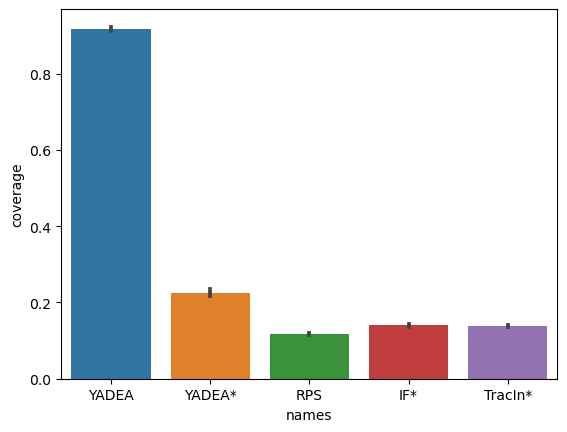

In [16]:
sns.barplot(df, x='names', y='coverage')

<AxesSubplot: xlabel='names', ylabel='hit_rate'>

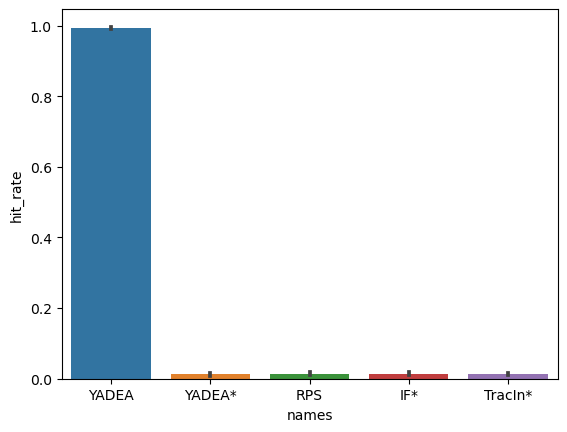

In [17]:
sns.barplot(df, x='names', y='hit_rate')

<AxesSubplot: xlabel='names', ylabel='execution_time'>

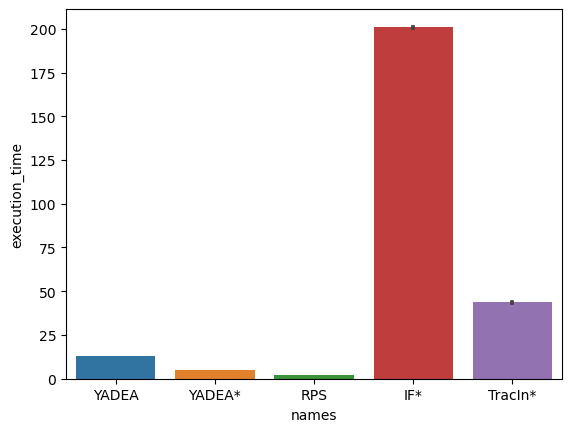

In [18]:
sns.barplot(df, x='names', y='execution_time')